# Lab 9 Advarsarial attack

Problem 1- Load Mobilenet pretrained model from tensorflow library. get some computer image from internet and predict the result using mobilenet model.

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [29]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = '/content/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

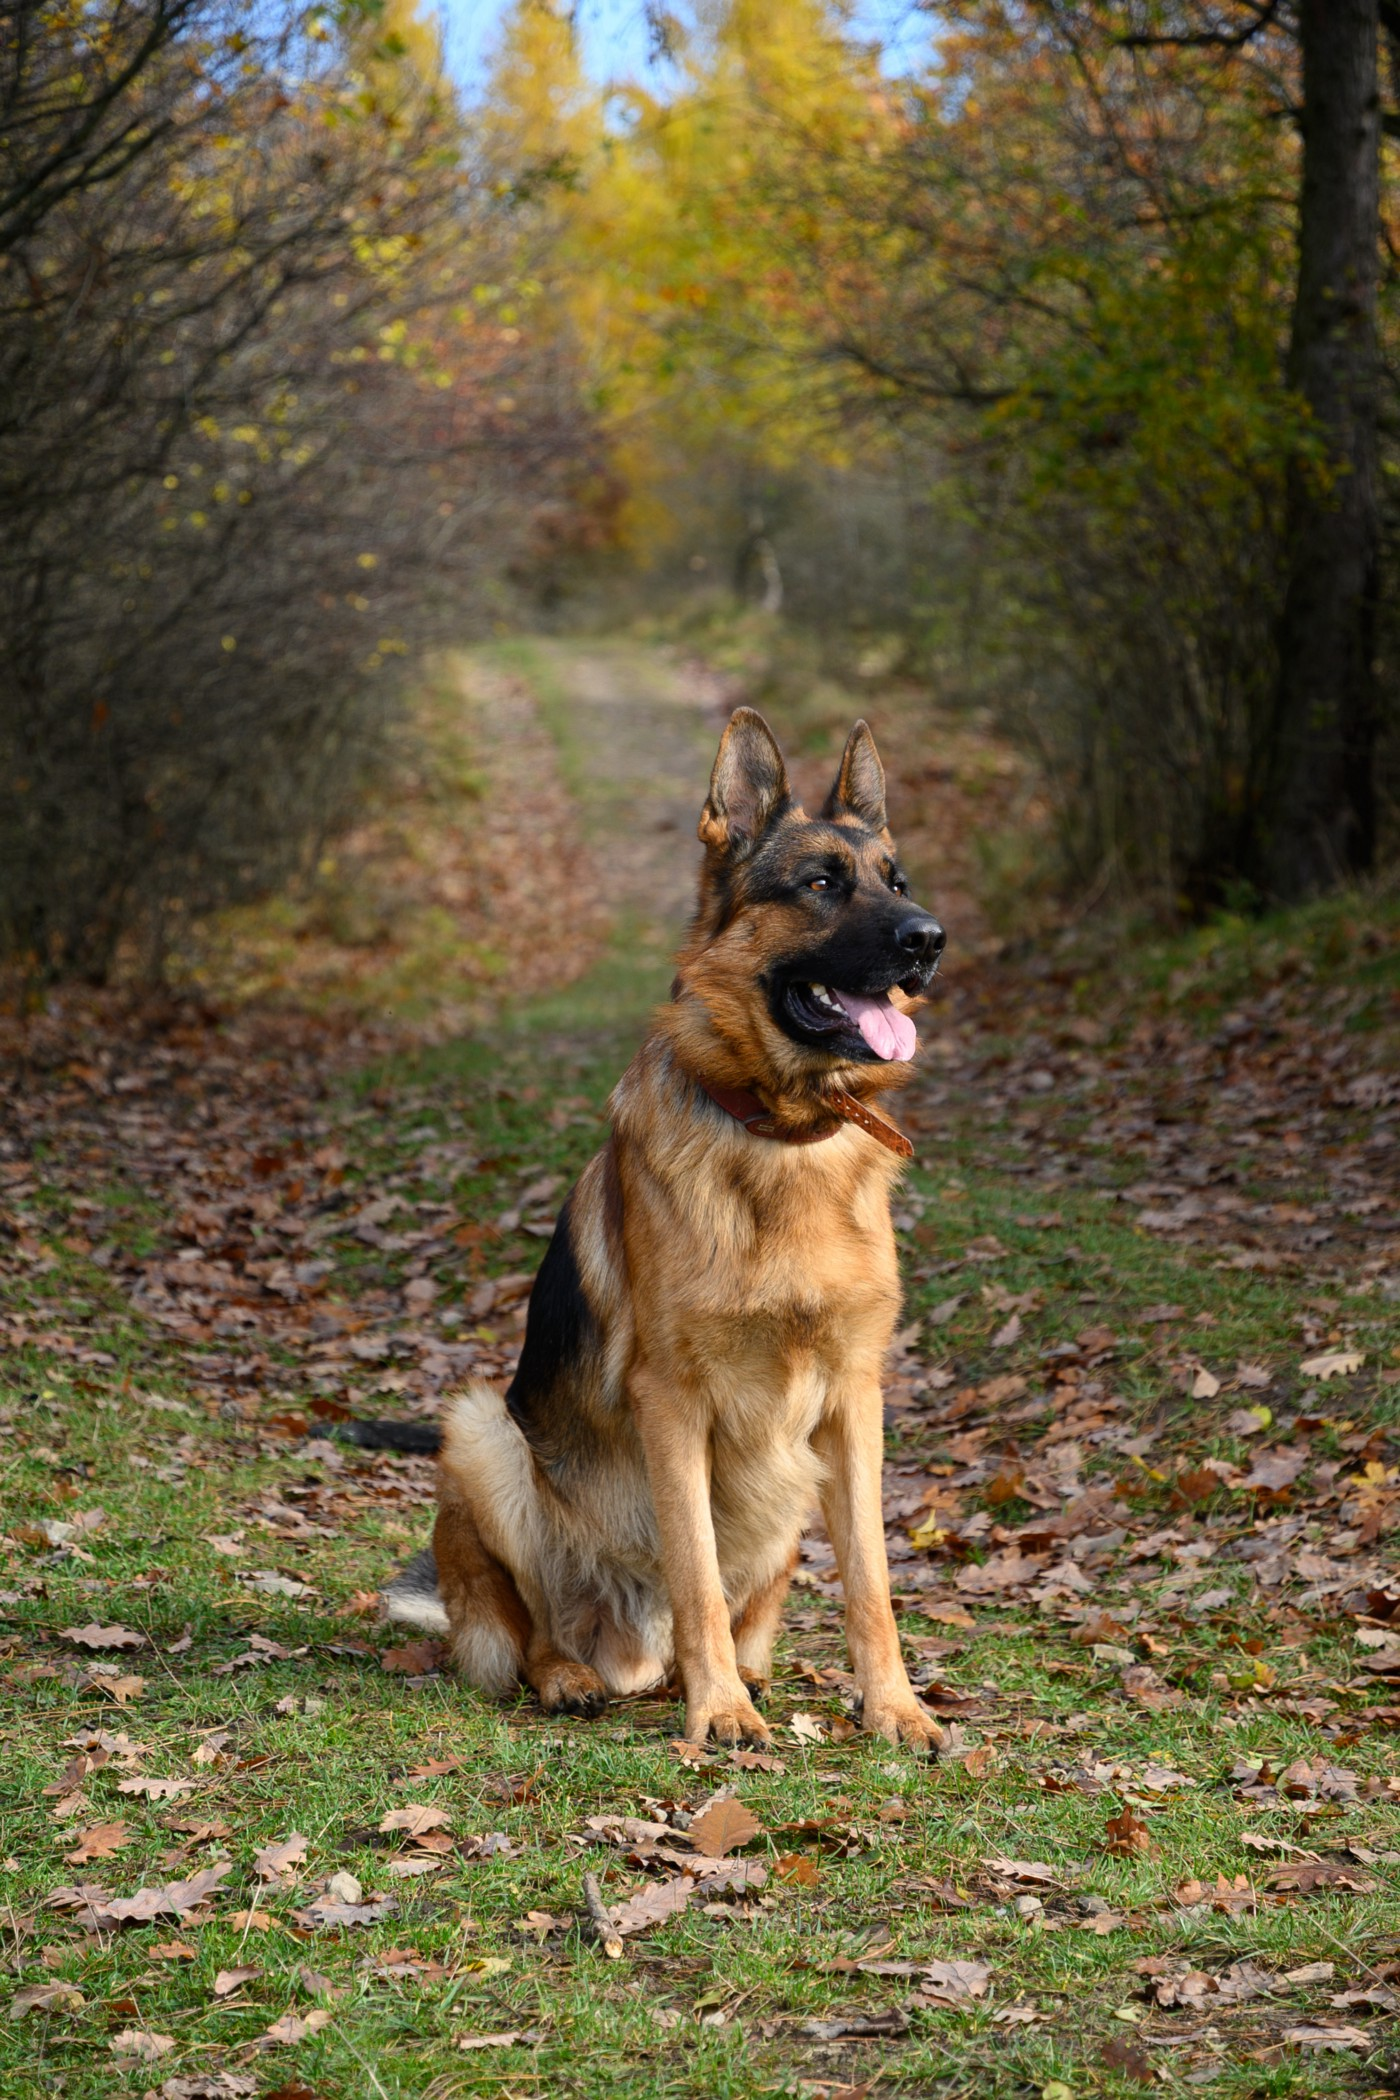

In [30]:
from IPython.display import Image
Image(filename='/content/German_Shepherd.jpg',width=300,height=400)

In [31]:
preprocessed_image = prepare_image('German_Shepherd.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 0us/step


[[('n02106662', 'German_shepherd', 0.9268111),
  ('n02105162', 'malinois', 0.035414837),
  ('n02111129', 'Leonberg', 0.019343961),
  ('n02105251', 'briard', 0.0030469073),
  ('n02097130', 'giant_schnauzer', 0.0029155368)]]

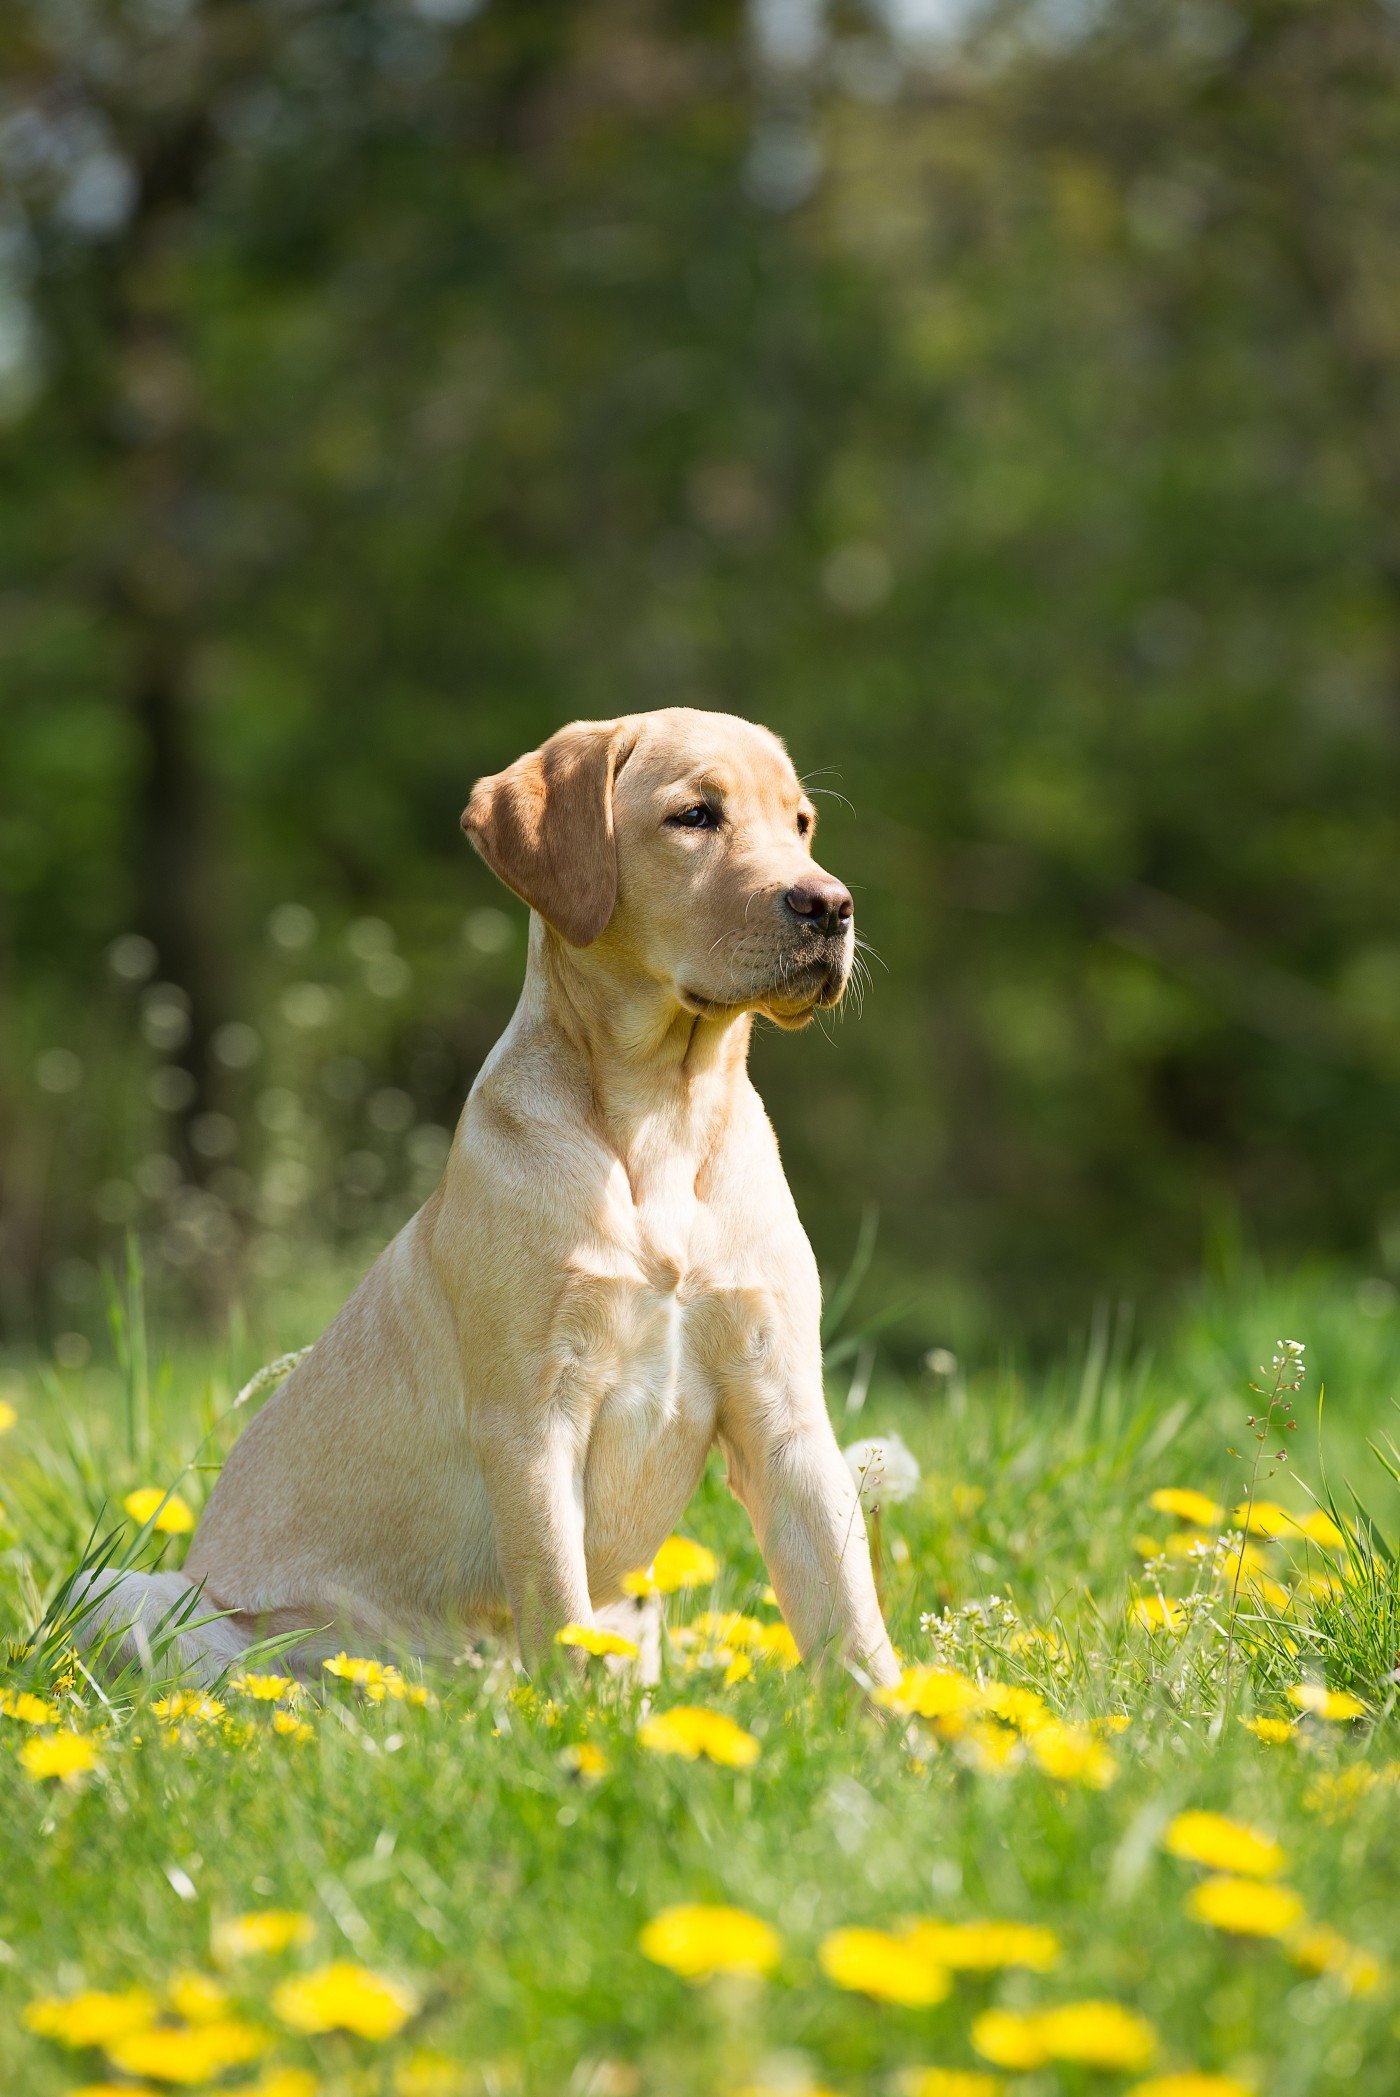

In [36]:
from IPython.display import Image
Image(filename='/content/labrador.jpg',width=300,height=400)

In [37]:
preprocessed_image = prepare_image('labrador.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 72ms/step


[[('n02092339', 'Weimaraner', 0.54077476),
  ('n02093647', 'Bedlington_terrier', 0.19452654),
  ('n02100583', 'vizsla', 0.04340528),
  ('n02100236', 'German_short-haired_pointer', 0.03424637),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.034025747)]]

Problem 2 - Genrate random noise ( [sample code](https://www.kaggle.com/code/chanduanilkumar/adding-and-removing-image-noise-in-python/notebook)) add to your image and apply Noise Attack on the model and observe the results.




In [45]:
img=cv2.imread("/content/German_Shepherd.jpg",0)


In [46]:
print(img.shape)

(2100, 1400)


In [50]:
gauss_noise=np.zeros((2100,1400),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

In [51]:
img=cv2.add(img,gauss_noise)

Text(0.5, 1.0, 'Combined')

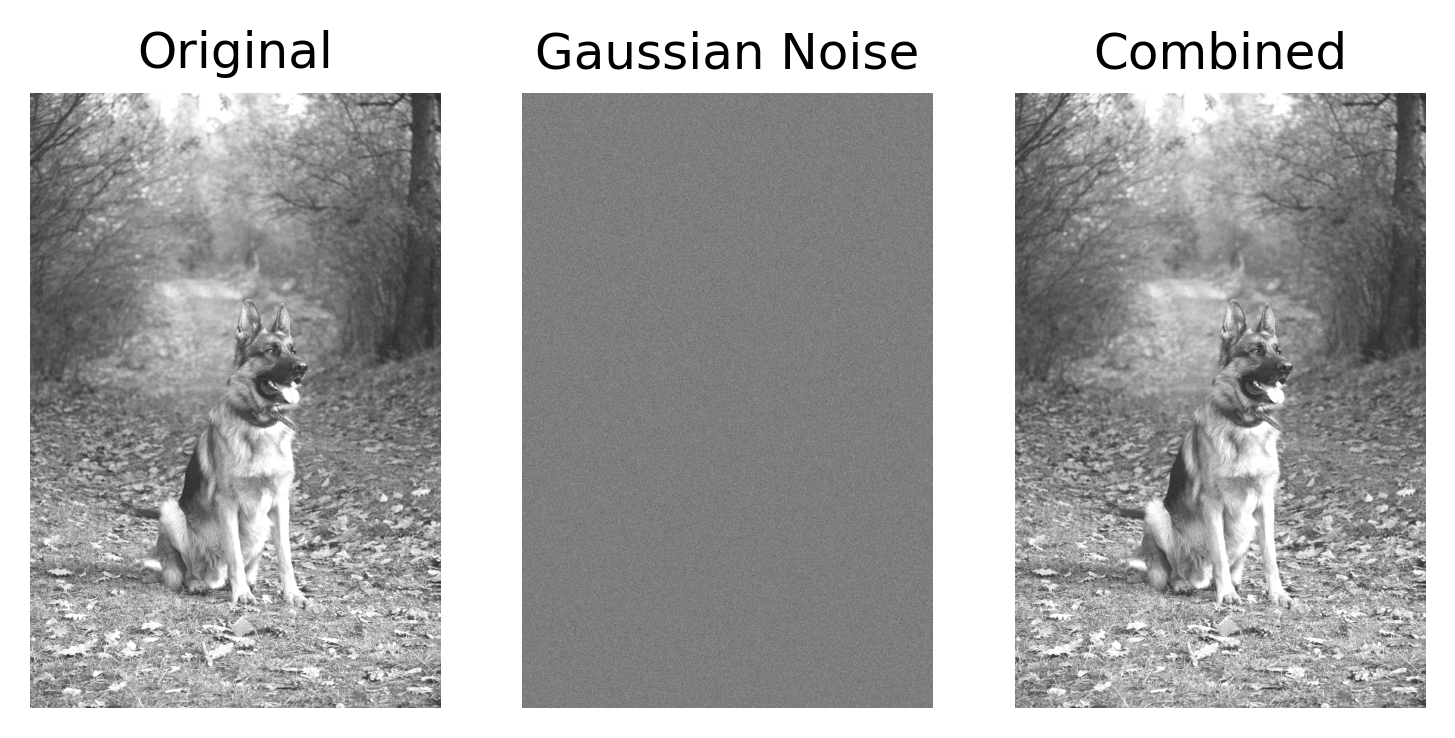

In [53]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Combined")

Problem 3 - Apply Semantic Attack on the model and observe the result. 

Problem 4- USe Fast gradient sign method to generate the noise (perturbation) and add to the image with different epsilon value and analyse the results. [Helping Notebbook](https://colab.research.google.com/drive/1Gh1-XVbBwqsT_BiUi0Hpfb8hTlabLrcD?usp=sharing)